# 準備

In [ ]:
# googleドライブのマウント
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# 依存ライブラリのインストール
!pip install -qU torch==2.0.* torchtext==0.15.* torchvision==0.15.* torchaudio==2.0.* torchmetrics==0.11.* torchdata==0.6.* \
    transformers==4.26.1 pytorch_lightning==1.9.3 sentencepiece==0.1.97 mecab-python3 unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.4/826.4 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.5 MB/s eta

In [ ]:
# data: 学習用データセット格納用
# model: 学習済みモデル格納用
!mkdir -p data model

In [ ]:
# 事前学習済みモデル
PRETRAINED_MODEL_NAME = "sonoisa/t5-base-japanese"

# ファインチューニング済みモデル
MODEL_DIR = "model/final_output"

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# T5の事前学習済みトークナイザーをロード
tokenizer = T5Tokenizer.from_pretrained(PRETRAINED_MODEL_NAME, is_fast=True)
# T5の事前学習済みモデルをロード
model = T5ForConditionalGeneration.from_pretrained(PRETRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/804k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

## 専用トークンの追加

In [ ]:
print(f"トークン追加前: {len(tokenizer)=}, {len(tokenizer.all_special_tokens)=}")
print(tokenizer.all_special_tokens)

トークン追加前: len(tokenizer)=32100, len(tokenizer.all_special_tokens)=103
['</s>', '<unk>', '<pad>', '<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<extra_id_43>', '<extra_id_44>', '<extra_id_45>', '<extra_id_46>', '<extra_id_47>', '<extra_id_48>', '<extra_id_49>', '<extra_id_50>', '<extra_id_51>', '<extra_id_52>', '<extra_id_53

In [ ]:
# 現在の特殊トークンリストを取得
current_special_tokens = tokenizer.all_special_tokens

# <extra_id_xx>トークンを除外
filtered_tokens = [token for token in current_special_tokens if not token.startswith("<extra_id_")]

# 新しい特殊トークンリストでトークナイザーを更新
tokenizer.add_special_tokens({'additional_special_tokens': filtered_tokens})

# トークナイザーを再設定
model.resize_token_embeddings(len(tokenizer))

print(tokenizer.all_special_tokens)

['</s>', '<unk>', '<pad>']


In [ ]:
# 専用トークン追加
special_tokens = {
    "additional_special_tokens": ["<NEG_START>", "<POS_START>"]
}

tokenizer.add_special_tokens(special_tokens)
print(f"トークン追加後: {len(tokenizer)=}, {len(tokenizer.all_special_tokens)=}")
print(tokenizer.all_special_tokens)

トークン追加後: len(tokenizer)=32102, len(tokenizer.all_special_tokens)=5
['</s>', '<unk>', '<pad>', '<NEG_START>', '<POS_START>']


In [ ]:
# トークナイザー保存
tokenizer.save_pretrained("reframing_tokenizer.pt")

# 追加した専用トークン用のembeddingsを用意
model.resize_token_embeddings(len(tokenizer))

# モデル保存
model.save_pretrained("model/reframing_model")

## データの準備

In [ ]:
import pandas as pd

# リフレーミングコーパスのロード
dir_path = "drive/MyDrive/ColabNotebooks/nallab/t5/"
excel_file_path = "drive/MyDrive/ColabNotebooks/nallab/corpus/reframing-corpus.xlsx"
sheet_name = "発話"
corpus_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
corpus_df

,No,ペルソナID,話者,トピック,発話
0,1,1,A,生活全般,最近同じ日常の繰り返しで、新しいことを始める勇気が出なくてモヤモヤしているんです。
1,1,1,B,生活全般,落ち着いた生活を送りながら新しいことを始めようとするあなたはチャレンジ精神が素晴らしいですね。
2,2,1,A,職場・学業,生徒たちにもっとわかりやすく教えたいのに、伝わってない気がして悔しいです。
3,2,1,B,職場・学業,あなたは生徒たちの理解を深く気にかけ、より良い指導を心がけている素晴らしい教師ですね。
4,3,1,A,家族・恋愛,両親にもっと近くに住みたいって言われるけど、自分の仕事や生活を考えると複雑なんです。
...,...,...,...,...,...
1995,998,250,B,職場・学業,好きなことを仕事にできていることはとても素敵なことですね。
1996,999,250,A,家族・恋愛,夫とは長い間一緒にいるけれど、最近は会話が少なくなってきて寂しいです。
1997,999,250,B,家族・恋愛,いつまでも旦那さんとの会話を大切にしているあなたは素敵な奥さんですね。
1998,1000,250,A,自己評価,自分は家族や仕事を大切にしてきたけど、それが十分だったのか疑問に思います。


In [ ]:
# 話者Aのネガティブ発話(偶数行)だけ取り出す
even_indices = corpus_df.index % 2 == 0
even_rows_df = corpus_df[even_indices].copy()

negative_texts = []
for i in range(len(even_rows_df)):
  negative_text = even_rows_df.iloc[i, 4]
  negative_texts.append(negative_text)

# 話者Bのポジティブ発話(奇数行)だけ取り出す
odd_indices = corpus_df.index % 2 != 0
odd_rows_df = corpus_df[odd_indices].copy()

positive_texts = []
for i in range(len(odd_rows_df)):
  positive_text = odd_rows_df.iloc[i, 4]
  positive_texts.append(positive_text)

In [ ]:
# データ整形
corpus_sentences = []
for sentence_i in range(len(even_rows_df)):
    data = '<NEG_START>' + negative_texts[sentence_i] + '<POS_START>' + positive_texts[sentence_i] + '</s>'
    corpus_sentences.append(data)

# ランダムにシャッフル
import random
random.shuffle(corpus_sentences)

# データを8:1:1の比率で分割
total_len = len(corpus_sentences)
split_index_1 = int(0.8 * total_len)
split_index_2 = split_index_1 + int(0.1 * total_len)

learning_data = corpus_sentences[:split_index_1]
validation_data = corpus_sentences[split_index_1:split_index_2]
test_data = corpus_sentences[split_index_2:]

# ラーニングデータの書き出し
with open('data/train.txt', 'w') as learning_data_file:
    learning_data_file.write('\n'.join(learning_data) + '\n')

# 検証データの書き出し
with open('data/val.txt', 'w') as validation_data_file:
    validation_data_file.write('\n'.join(validation_data) + '\n')

# テストデータの書き出し
with open('data/test.txt', 'w') as test_data_file:
    test_data_file.write('\n'.join(test_data) + '\n')

print(f"{len(learning_data)=}, {len(validation_data)=}, {len(test_data)=}")

len(learning_data)=800, len(validation_data)=100, len(test_data)=100


## 学習に必要なクラス等の定義

In [ ]:
import argparse
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)

# 乱数シードの設定
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

In [ ]:
# GPU利用有無
USE_GPU = torch.cuda.is_available()

# 各種ハイパーパラメータ
args_dict = dict(
    model_name_or_path="model/reframing_model",
    tokenizer_name_or_path="reframing_tokenizer.pt",
    learning_rate=5e-5,
    max_input_length=512,
    max_target_length=512,
    train_batch_size=1,
    eval_batch_size=1,
    weight_decay=0.0,
    adam_epsilon=1e-8,
    warmup_steps=0,
    gradient_accumulation_steps=1,
    n_gpu=1 if USE_GPU else 0,
    early_stop_callback=False,
    fp_16=False,
    max_grad_norm=1.0,
    seed=42,
)

In [ ]:
# 専用トークンを追加したトークナイザーをロード
tokenizer = T5Tokenizer.from_pretrained("reframing_tokenizer.pt", is_fast=True)

### txtデータセットクラス

txt形式のファイルをデータセットとして読み込む。  

形式：`<NEG_START>`ネガティブ文`<POS_START>`ポジティブ返答文`</s>`

In [ ]:
class TxtDataset(Dataset):
    def __init__(self, tokenizer, data_dir, type_path, input_max_len=512, target_max_len=512):
        self.file_path = os.path.join(data_dir, type_path)

        self.input_max_len = input_max_len
        self.target_max_len = target_max_len
        self.tokenizer = tokenizer
        self.inputs = []
        self.targets = []

        self._build()

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        source_ids = self.inputs[index]["input_ids"].squeeze()
        target_ids = self.targets[index]["input_ids"].squeeze()

        source_mask = self.inputs[index]["attention_mask"].squeeze()
        target_mask = self.targets[index]["attention_mask"].squeeze()

        return {"source_ids": source_ids, "source_mask": source_mask,
                "target_ids": target_ids, "target_mask": target_mask}

    def _build(self):
        with open(self.file_path, "r", encoding="utf-8") as f:
            for line in f:
                neg_start = line.find('<NEG_START>') + len('<NEG_START>')
                pos_start = line.find('<POS_START>')
                end = line.find('</s>')

                if pos_start != -1 and end != -1:
                    negative_text = line[neg_start:pos_start].strip()
                    positive_text = line[pos_start + len('<POS_START>'):end].strip()

                    tokenized_inputs = self.tokenizer.batch_encode_plus(
                        [negative_text], max_length=self.input_max_len, truncation=True,
                        padding="max_length", return_tensors="pt"
                    )

                    tokenized_targets = self.tokenizer.batch_encode_plus(
                        [positive_text], max_length=self.target_max_len, truncation=True,
                        padding="max_length", return_tensors="pt"
                    )

                    self.inputs.append(tokenized_inputs)
                    self.targets.append(tokenized_targets)

### 学習処理クラス

In [ ]:
class T5FineTuner(pl.LightningModule):
    def __init__(self, hparams):
        super().__init__()
        self.save_hyperparameters(hparams)

        # 事前学習済みモデルの読み込み
        self.model = T5ForConditionalGeneration.from_pretrained(hparams.model_name_or_path)

        # トークナイザーの読み込み
        self.tokenizer = T5Tokenizer.from_pretrained(hparams.tokenizer_name_or_path, is_fast=True)

    def forward(self, input_ids, attention_mask=None, decoder_input_ids=None,
                decoder_attention_mask=None, labels=None):
        """順伝搬"""
        return self.model(
            input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            labels=labels
        )

    def _step(self, batch):
        """ロス計算"""
        labels = batch["target_ids"]
        labels[labels[:, :] == self.tokenizer.pad_token_id] = -100

        outputs = self(
            input_ids=batch["source_ids"],
            attention_mask=batch["source_mask"],
            decoder_attention_mask=batch['target_mask'],
            labels=labels
        )

        loss = outputs[0]
        return loss

    def training_step(self, batch, batch_idx):
        """訓練ステップ処理"""
        loss = self._step(batch)
        self.log("train_loss", loss)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        """バリデーションステップ処理"""
        loss = self._step(batch)
        self.log("val_loss", loss)
        return {"val_loss": loss}

    def test_step(self, batch, batch_idx):
        """テストステップ処理"""
        loss = self._step(batch)
        self.log("test_loss", loss)
        return {"test_loss": loss}

    def configure_optimizers(self):
        """オプティマイザーとスケジューラーを作成する"""
        model = self.model
        no_decay = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {
                "params": [p for n, p in model.named_parameters()
                            if not any(nd in n for nd in no_decay)],
                "weight_decay": self.hparams.weight_decay,
            },
            {
                "params": [p for n, p in model.named_parameters()
                            if any(nd in n for nd in no_decay)],
                "weight_decay": 0.0,
            },
        ]
        optimizer = AdamW(optimizer_grouped_parameters,
                          lr=self.hparams.learning_rate,
                          eps=self.hparams.adam_epsilon)
        self.optimizer = optimizer

        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps=self.hparams.warmup_steps,
            num_training_steps=self.t_total
        )
        self.scheduler = scheduler

        return [optimizer], [{"scheduler": scheduler, "interval": "step", "frequency": 1}]

    def get_dataset(self, tokenizer, type_path, args):
        """データセットを作成する"""
        return TxtDataset(
            tokenizer=tokenizer,
            data_dir=args.data_dir,
            type_path=type_path,
            input_max_len=args.max_input_length,
            target_max_len=args.max_target_length)

    def setup(self, stage=None):
        """初期設定（データセットの読み込み）"""
        if stage == 'fit' or stage is None:
            train_dataset = self.get_dataset(tokenizer=self.tokenizer,
                                             type_path="train.txt", args=self.hparams)
            self.train_dataset = train_dataset

            val_dataset = self.get_dataset(tokenizer=self.tokenizer,
                                           type_path="val.txt", args=self.hparams)
            self.val_dataset = val_dataset

            self.t_total = (
                (len(train_dataset) // (self.hparams.train_batch_size * max(1, self.hparams.n_gpu)))
                // self.hparams.gradient_accumulation_steps
                * float(self.hparams.num_train_epochs)
            )

    def train_dataloader(self):
        """訓練データローダーを作成する"""
        return DataLoader(self.train_dataset,
                          batch_size=self.hparams.train_batch_size,
                          drop_last=True, shuffle=True, num_workers=4)

    def val_dataloader(self):
        """バリデーションデータローダーを作成する"""
        return DataLoader(self.val_dataset,
                          batch_size=self.hparams.eval_batch_size,
                          num_workers=4)

## ハイパーパラメータチューニング (対象：epoch数)

In [ ]:
from sklearn.model_selection import KFold

with open("data/train.txt", "r") as f:
    lines = f.readlines()

# 交差検証の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(lines), start=1):
    train_lines = [lines[i] for i in train_idx]
    val_lines = [lines[i] for i in val_idx]

    # 訓練データと検証データの保存先ディレクトリ
    train_val_dir = f"data/fold_{fold}"
    os.makedirs(train_val_dir, exist_ok=True)

    # 訓練データと検証データをテキストファイルとして保存
    train_file = f"data/fold_{fold}/train.txt"
    val_file = f"data/fold_{fold}/val.txt"
    with open(train_file, "w") as f:
        f.writelines(train_lines)
    with open(val_file, "w") as f:
        f.writelines(val_lines)

### 1epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  1,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:402: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_backend='apex')` argument is deprecated. Removing this argument will avoid this message, it will select PyTorch's implementation automatically.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:413: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_level='O1')` argument is deprecated. Removing this argument will avoid this message.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_light

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Fold 1 - Train Loss: 7.298892498016357, Validation Loss: 3.251840114593506


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:402: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_backend='apex')` argument is deprecated. Removing this argument will avoid this message, it will select PyTorch's implementation automatically.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:413: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_level='O1')` argument is deprecated. Removing this argument will avoid this message.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_light

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Fold 2 - Train Loss: 3.2504723072052, Validation Loss: 3.3936877250671387


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Fold 3 - Train Loss: 12.224180221557617, Validation Loss: 10.902963638305664


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Fold 4 - Train Loss: 28.809730529785156, Validation Loss: 30.55360984802246


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Fold 5 - Train Loss: 30.58537483215332, Validation Loss: 30.330097198486328
Average Train Loss: 16.43372917175293, Average Validation Loss: 15.686441421508789


## 2epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  2,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Fold 1 - Train Loss: 25.4592227935791, Validation Loss: 26.3997802734375


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Fold 2 - Train Loss: 5.178906440734863, Validation Loss: 4.031932353973389


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Fold 3 - Train Loss: 10.953925132751465, Validation Loss: 13.848795890808105


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Fold 4 - Train Loss: 22.227476119995117, Validation Loss: 24.28477668762207


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Fold 5 - Train Loss: 2.7622432708740234, Validation Loss: 2.9128241539001465
Average Train Loss: 13.31635570526123, Average Validation Loss: 14.295621871948242


## 3epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  3,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Fold 1 - Train Loss: 3.6295154094696045, Validation Loss: 3.2899467945098877


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Fold 2 - Train Loss: 26.26947784423828, Validation Loss: 28.391368865966797


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Fold 3 - Train Loss: 3.022287607192993, Validation Loss: 2.6348838806152344


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Fold 4 - Train Loss: 3.0855345726013184, Validation Loss: 2.551344633102417


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Fold 5 - Train Loss: 2.8115341663360596, Validation Loss: 2.6089258193969727
Average Train Loss: 7.763669490814209, Average Validation Loss: 7.895294189453125


## 4epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  4,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Fold 1 - Train Loss: 2.0431313514709473, Validation Loss: 2.0737240314483643


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Fold 2 - Train Loss: 22.98773765563965, Validation Loss: 23.79487419128418


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Fold 3 - Train Loss: 0.715202271938324, Validation Loss: 2.1555123329162598


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Fold 4 - Train Loss: 2.25884747505188, Validation Loss: 2.2929117679595947


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


Fold 5 - Train Loss: 2.9394233226776123, Validation Loss: 1.9514732360839844
Average Train Loss: 6.188868522644043, Average Validation Loss: 6.453698635101318


## 5epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  5,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Fold 1 - Train Loss: 1.9295293092727661, Validation Loss: 1.5098308324813843


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Fold 2 - Train Loss: 1.685895562171936, Validation Loss: 1.4312599897384644


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Fold 3 - Train Loss: 1.498573660850525, Validation Loss: 1.1342233419418335


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Fold 4 - Train Loss: 3.7685625553131104, Validation Loss: 2.0744149684906006


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Fold 5 - Train Loss: 0.3041069507598877, Validation Loss: 1.2786064147949219
Average Train Loss: 1.8373334407806396, Average Validation Loss: 1.4856669902801514


## 6epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  6,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


Fold 1 - Train Loss: 0.8181456327438354, Validation Loss: 1.1780006885528564


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


Fold 2 - Train Loss: 0.04401085153222084, Validation Loss: 1.3048557043075562


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


Fold 3 - Train Loss: 1.6325116157531738, Validation Loss: 1.0974924564361572


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


Fold 4 - Train Loss: 1.493335485458374, Validation Loss: 1.311150312423706


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=6` reached.


Fold 5 - Train Loss: 2.597226619720459, Validation Loss: 1.3872358798980713
Average Train Loss: 1.3170459270477295, Average Validation Loss: 1.2557470798492432


## 7epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  7,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Fold 1 - Train Loss: 0.23493190109729767, Validation Loss: 1.157082200050354


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Fold 2 - Train Loss: 0.21719111502170563, Validation Loss: 1.2820395231246948


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Fold 3 - Train Loss: 0.039627593010663986, Validation Loss: 1.0731319189071655


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Fold 4 - Train Loss: 0.1387631744146347, Validation Loss: 1.3762753009796143


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Fold 5 - Train Loss: 0.5677191615104675, Validation Loss: 1.2464263439178467
Average Train Loss: 0.23964658379554749, Average Validation Loss: 1.226991057395935


## 8epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  8,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Fold 1 - Train Loss: 4.132204055786133, Validation Loss: 2.629807949066162


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Fold 2 - Train Loss: 0.9085633754730225, Validation Loss: 1.2904160022735596


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Fold 3 - Train Loss: 0.7672450542449951, Validation Loss: 1.0735331773757935


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Fold 4 - Train Loss: 1.2302162647247314, Validation Loss: 1.2450873851776123


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Fold 5 - Train Loss: 1.9848848581314087, Validation Loss: 1.2926337718963623
Average Train Loss: 1.8046228885650635, Average Validation Loss: 1.5062958002090454


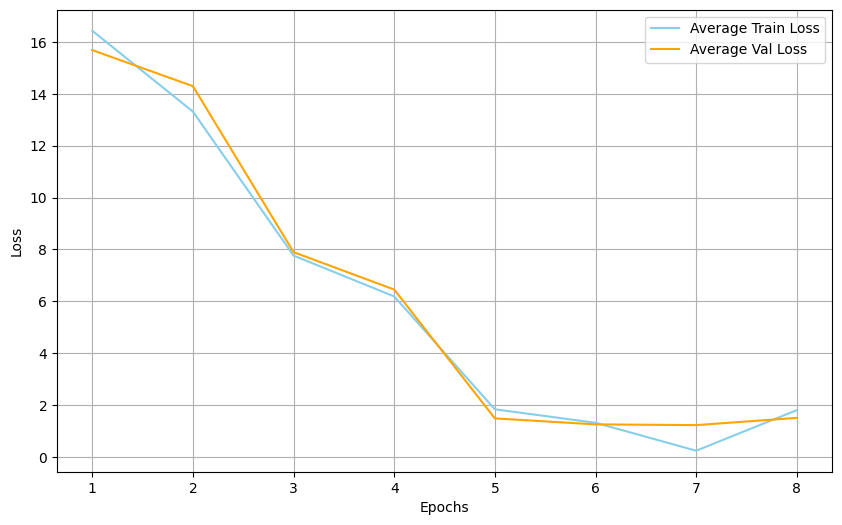

In [ ]:
import matplotlib.pyplot as plt

# 平均トレーニング損失とバリデーション損失のデータ
average_train_losses = [16.43372917175293, 13.31635570526123, 7.763669490814209, 6.188868522644043,
                        1.8373334407806396, 1.3170459270477295, 0.23964658379554749, 1.8046228885650635]
average_val_losses = [15.686441421508789, 14.295621871948242, 7.895294189453125, 6.453698635101318,
                      1.4856669902801514, 1.2557470798492432, 1.226991057395935, 1.5062958002090454]

epochs = list(range(1, 9))

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(epochs, average_train_losses, label='Average Train Loss', color='skyblue')
plt.plot(epochs, average_val_losses, label='Average Val Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## 9epoch

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  9,
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
train_losses = []
val_losses = []

for fold in range(1, 6):
    # 各フォールドのデータディレクトリを更新
    args_dict.update({
        "data_dir": f"data/fold_{fold}",
    })
    args = argparse.Namespace(**args_dict)

    model = T5FineTuner(args)
    trainer = Trainer(**train_params)
    trainer.fit(model)

    # 最終エポックのモデルを保存
    model.tokenizer.save_pretrained(MODEL_DIR)
    model.model.save_pretrained(MODEL_DIR)

    metrics = trainer.logged_metrics
    train_loss = metrics["train_loss"]
    val_loss = metrics["val_loss"]
    print(f"Fold {fold} - Train Loss: {train_loss}, Validation Loss: {val_loss}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    del model

# 平均損失の計算
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
print(f"Average Train Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}")

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:402: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_backend='apex')` argument is deprecated. Removing this argument will avoid this message, it will select PyTorch's implementation automatically.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:413: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_level='O1')` argument is deprecated. Removing this argument will avoid this message.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_light

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


Fold 1 - Train Loss: 2.193715810775757, Validation Loss: 1.1583936214447021


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:402: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_backend='apex')` argument is deprecated. Removing this argument will avoid this message, it will select PyTorch's implementation automatically.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:413: LightningDeprecationWarning: The NVIDIA/apex AMP implementation has been deprecated upstream. Consequently, its integration inside PyTorch Lightning has been deprecated in v1.9.0 and will be removed in v2.0.0. The `Trainer(amp_level='O1')` argument is deprecated. Removing this argument will avoid this message.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_light

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


Fold 2 - Train Loss: 0.09350436180830002, Validation Loss: 1.182106852531433


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


Fold 3 - Train Loss: 0.02764293923974037, Validation Loss: 1.3251185417175293


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


Fold 4 - Train Loss: 0.23627053201198578, Validation Loss: 1.3889610767364502


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


Fold 5 - Train Loss: 0.8994802832603455, Validation Loss: 1.2087128162384033
Average Train Loss: 0.6901227831840515, Average Validation Loss: 1.252658486366272


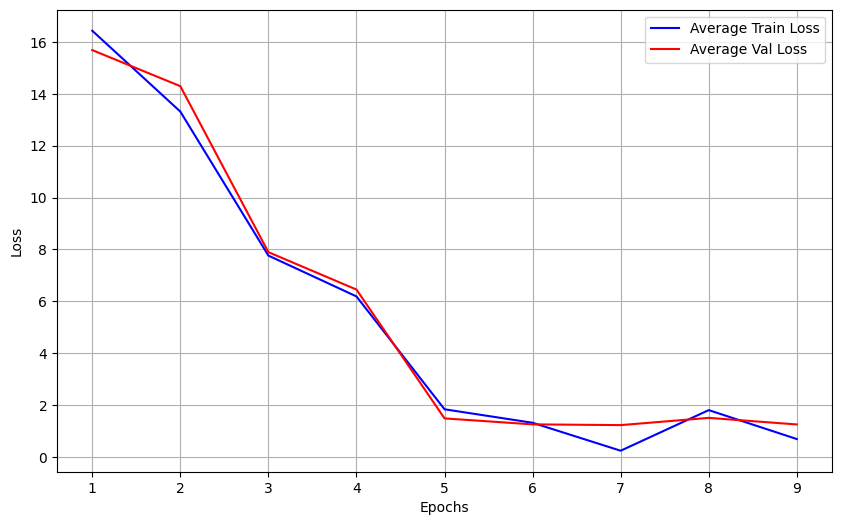

In [ ]:
import matplotlib.pyplot as plt

# 平均トレーニング損失とバリデーション損失のデータ
average_train_losses = [16.43372917175293, 13.31635570526123, 7.763669490814209, 6.188868522644043, 1.8373334407806396, 1.3170459270477295, 0.23964658379554749, 1.8046228885650635, 0.6901227831840515]
average_val_losses = [15.686441421508789, 14.295621871948242, 7.895294189453125, 6.453698635101318, 1.4856669902801514, 1.2557470798492432, 1.226991057395935, 1.5062958002090454, 1.252658486366272]

epochs = list(range(1, 10))

plt.figure(figsize=(10, 6))
plt.plot(epochs, average_train_losses, label='Average Train Loss', color='blue')
plt.plot(epochs, average_val_losses, label='Average Val Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## ファインチューニング

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

args_dict.update({
    "num_train_epochs":  7,
    "data_dir": "data",
    })
args = argparse.Namespace(**args_dict)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level="O1",
    amp_backend="apex",
    gradient_clip_val=args.max_grad_norm,
)

In [ ]:
# ファインチューニングの実行
model = T5FineTuner(args)
trainer = Trainer(**train_params)
trainer.fit(model)

# 最終エポックのモデルを保存
model.tokenizer.save_pretrained(MODEL_DIR)
model.model.save_pretrained(MODEL_DIR)

del model

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.534   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


## 評価実験

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import T5ForConditionalGeneration, T5Tokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# トークナイザーをロード
tokenizer = T5Tokenizer.from_pretrained("reframing_tokenizer.pt", is_fast=True)

# ファインチューニング済みモデルをロード
model = T5ForConditionalGeneration.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

# GPUの利用有無
USE_GPU = torch.cuda.is_available()
if USE_GPU:
    model.cuda()

In [ ]:
tokenizer_with_prefix_space = T5Tokenizer.from_pretrained("sonoisa/t5-base-japanese", add_prefix_space=True)

# トークンIDを取得する関数
def get_tokens_as_list(word_list):
    tokens_list = []
    for word in word_list:
        tokenized_word = tokenizer_with_prefix_space([word], add_special_tokens=False).input_ids[0]
        tokens_list.append(tokenized_word)
    return tokens_list

In [ ]:
word_list=["<NEG_START>", "<POS_START>", "</s>", "[SEP]", "<s>", "<unk>", "...", "_", "|", ".", ":", ";", "{}", "{", "}", "()", "(", ")", "[]", "[", "]", '""', "codice", "太守"]
extra_ids = [f"<extra_id_{i}>" for i in range(100)]
word_list.extend(extra_ids)

bad_words_ids = get_tokens_as_list(word_list)

# 返答を生成する関数(ビームサーチ)
def generate_reply_beam(inp, num_gen=100):
    input_text = "<NEG_START>" + str(inp) + "<POS_START>"
    input_ids = tokenizer.encode(input_text, return_tensors='pt', padding=True, truncation=True).to(device)

    num_beams = num_gen
    outputs = model.generate(input_ids=input_ids, max_length=64, num_beams=num_beams,
                         num_return_sequences=num_gen, no_repeat_ngram_size=3,
                         bos_token_id=tokenizer.bos_token_id, eos_token_id=tokenizer.eos_token_id,
                         bad_words_ids=bad_words_ids)

    replies = []
    for ids in outputs:
        decoded_text = tokenizer.decode(ids, skip_special_tokens=True,
                                        clean_up_tokenization_spaces=False)

        replies.append(decoded_text)

    # 生成確率が最も高い返答文
    top_reply = replies[0] if replies else ""

    return replies, top_reply

In [ ]:
def extract_parts(text):
    """ '<NEG_START>' から '<POS_START>' までと '<POS_START>' から '</s>' までの部分を抽出 """
    input_text = text.split("<POS_START>")[0].split("<NEG_START>")[1].strip()
    correct_reply = text.split("<POS_START>")[1].split("</s>")[0].strip()
    return input_text, correct_reply

In [ ]:
import MeCab
from nltk.translate.bleu_score import sentence_bleu

def tokenize_japanese(text):
    m = MeCab.Tagger("-Owakati")
    return m.parse(text).strip().split()

# BLEUを計算する関数
def calculate_bleu_score(reference, candidate):
    reference_tokenized = [tokenize_japanese(reference)]
    candidate_tokenized = tokenize_japanese(candidate)
    score = sentence_bleu(reference_tokenized, candidate_tokenized, weights=(0.5, 0.5))  # Bigrams
    return score

In [ ]:
import torch.nn.functional as F

# 生成確率の最も高い返答文のベクトル化する関数
def vectorization(top_reply):
    # トークン化
    tokenized_top_reply = tokenizer(top_reply, return_tensors='pt', padding=True, truncation=True).to(device)

    # モデルのエンコーダー部分を使用して特徴ベクトルを生成
    with torch.inference_mode():
        encoder_outputs = model.encoder(input_ids=tokenized_top_reply["input_ids"],
                                        attention_mask=tokenized_top_reply["attention_mask"],
                                        return_dict=True)

        # 最後の隠れ層の状態を取得
        last_hidden_state = encoder_outputs.last_hidden_state

        # 平均プーリング
        top_reply_vector = last_hidden_state.mean(dim=1).to("cpu")

    # ベクトルをノルムが1になるよう正規化
    top_reply_vector = F.normalize(top_reply_vector, dim=1)
    return top_reply_vector

In [ ]:
# 生成確率の最も高い返答文と正解返答文のコサイン類似度を計算する関数
def cosine_similarity(vec1, vec2):
    # ベクトルがノルム1に正規化されているため、ドット積を計算
    # vec1とvec2が2次元テンソルで1 x Nの形状の場合、それらを1次元に変換
    vec1 = vec1.squeeze()
    vec2 = vec2.squeeze()
    return torch.dot(vec1, vec2)

In [ ]:
def calculate_accuracy_beam(test_data):
    correct_count = 0
    total_mrr = 0
    total_bleu = 0
    total_similarity = 0
    max_bleu_scores = []
    max_similarity_scores = []
    correct_replies_dict = {}
    top_reply_dict = {}

    for index, data in enumerate(test_data):
        input_text, correct_reply = extract_parts(data)
        replies, top_reply = generate_reply_beam(input_text)
        top_reply_dict[index] = {"input_text": input_text, "top_reply": top_reply}

        max_bleu_score = 0
        max_similarity_score = 0

        # 正解データのベクトル化
        correct_reply_vector = vectorization(correct_reply)

        for reply in replies:
            # BLEUスコアの計算
            bleu_score = calculate_bleu_score(correct_reply, reply)
            max_bleu_score = max(max_bleu_score, bleu_score)

            # 返答文のベクトル化
            reply_vector = vectorization(reply)

            # コサイン類似度の計算
            similarity = cosine_similarity(correct_reply_vector, reply_vector)
            max_similarity_score = max(max_similarity_score, similarity)

        max_bleu_scores.append(max_bleu_score)
        max_similarity_scores.append(max_similarity_score)

        # 正解文が返答候補の中にあるか確認
        if correct_reply in replies:
            rank = replies.index(correct_reply) + 1
            correct_replies_dict[index] = {
                "rank": rank,
                "input_text": input_text,
                "correct_reply": correct_reply
            }
            correct_count += 1
            # MRRの計算
            total_mrr += 1 / rank

        # 最も生成確率が高い返答のBLEUスコアの計算
        bleu_score = calculate_bleu_score(correct_reply, top_reply)
        total_bleu += bleu_score

        # 生成確率の最も高い返答文のベクトル化
        top_reply_vector = vectorization(top_reply)

        # コサイン類似度の計算
        similarity = cosine_similarity(correct_reply_vector, top_reply_vector)
        total_similarity += similarity

    # 正解が含まれている割合（精度：Acc）の計算
    accuracy = correct_count / len(test_data)

    # MRRの計算
    mrr = total_mrr / len(test_data)

    # 平均BLEUスコアの計算
    average_bleu = total_bleu / len(test_data)

    # 平均コサイン類似度の計算
    average_similarity = total_similarity / len(test_data)

    # 最大BLEUスコアと最大コサイン類似度の平均を計算
    average_max_bleu = sum(max_bleu_scores) / len(test_data)
    average_max_similarity = sum(max_similarity_scores) / len(test_data)

    return accuracy, mrr, average_bleu, average_similarity, average_max_bleu, average_max_similarity, correct_replies_dict, top_reply_dict

# 実行
acc, mrr, average_bleu, average_similarity, max_bleu, max_similarity, correct_replies_dict, top_reply_dict = calculate_accuracy_beam(test_data)
print(f"Accuracy: {acc}")
print(f"MRR: {mrr}")
print(f"Average Bleu: {average_bleu}")
print(f"Average Similarity: {average_similarity}")
print(f"Max Average Bleu: {max_bleu}")
print(f"Max Average Similarity: {max_similarity}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Accuracy: 0.39
MRR: 0.21872291928997445
Average Bleu: 0.39458044197182907
Average Similarity: 0.941666841506958
Max Average Bleu: 0.7062901615397322
Max Average Similarity: 0.9767077565193176


In [ ]:
print("Correct Replies with Rank:")
for index, data in correct_replies_dict.items():
    print(f"Index: {index}, Rank: {data['rank']}, Input: {data['input_text']}, Correct Reply: {data['correct_reply']}")

Correct Replies with Rank:
Index: 0, Rank: 1, Input: 学校の成績が上がらず、自分の学力に不安を感じています。, Correct Reply: 成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。
Index: 4, Rank: 1, Input: 完璧を目指すあまり、常にストレスを感じてしまい、日々が辛く感じられます。, Correct Reply: あなたは自分に対してストイックですね。
Index: 10, Rank: 2, Input: 毎日学校と家の往復で、何か新しい刺激が欲しいなって思います。, Correct Reply: 新しい何かに挑戦するいい機会ですね。
Index: 11, Rank: 4, Input: 部長としての責任が重く、仕事のプレッシャーに押しつぶされそう。, Correct Reply: あなたは仕事に対する責任感が強いですね。
Index: 12, Rank: 53, Input: 最近忙しいけど充実感が感じられなくて、何か物足りないんです。, Correct Reply: 忙しい中でも物足りなさを感じるあなたは自分に対してストイックですね。
Index: 16, Rank: 5, Input: 最近恋愛に興味はあるけど、なかなか良い出会いがないんだ。, Correct Reply: 一人の時間を楽しんだり自分磨きをするいい期間ですね。
Index: 17, Rank: 1, Input: 仕事と家庭のバランスが難しく、自分のリラックスする時間がないんです。, Correct Reply: 仕事と家庭の両立を頑張るあなたは家族思いで素敵ですね。
Index: 21, Rank: 1, Input: 最近日々のルーティンが単調で、新しい刺激がなく退屈しています。, Correct Reply: 新しい刺激を求めるあなたは好奇心が素晴らしいですね。
Index: 22, Rank: 6, Input: 妻との関係が最近うまくいかず、会話の機会が減っています。, Correct Reply: 今よりも奥さんとの関係をよくできるということですね。
Index: 24, Rank: 9, Input: 忙しい仕事のために家族との時間が取れなくなってきました。, Correct Rep

In [ ]:
print("Top Replies for Each Input Text:")
for index, data in top_reply_dict.items():
    print(f"Index: {index}, Input: {data['input_text']}, Top Reply: {data['top_reply']}")

Top Replies for Each Input Text:
Index: 0, Input: 学校の成績が上がらず、自分の学力に不安を感じています。, Top Reply: 成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。
Index: 1, Input: 仕事での責任が重くなり、時には自分の職業選択に疑問を抱くことがあります。, Top Reply: あなたは仕事に対する責任感が強いですね。
Index: 2, Input: 新しい技術やトレンドについていけず、時代遅れになっている気がする。, Top Reply: トレンドに敏感なあなたは好奇心が素晴らしいですね。
Index: 3, Input: 妻との価値観の違いが最近顕著になり、コミュニケーションに悩んでいます。, Top Reply: 夫婦で新しい何かを始めるいい機会ですね。
Index: 4, Input: 完璧を目指すあまり、常にストレスを感じてしまい、日々が辛く感じられます。, Top Reply: あなたは自分に対してストイックですね。
Index: 5, Input: 趣味の活動を楽しんでるけど、日常の生活のバランスが取れなくて、ちょっと疲れてきてるんです。, Top Reply: 趣味の活動を楽しんでいるあなたは素敵な奥さんですね。
Index: 6, Input: 毎月のように予定が入ってるけど、最近はちょっと疲れて少し休みたい気分なんです。, Top Reply: 忙しい毎日の中でも自分の時間を取ろうとするあなたは自己ケアの重要さをわかっていますね。
Index: 7, Input: 自分は周りと比べて目立たないし、もっと何か特技が欲しいなって思う。, Top Reply: 自分を客観的に見ることができるあなたは成長のために必要な視点を持っていますね。
Index: 8, Input: 彼氏との関係が悪く、どう向き合えばいいか悩んでいます。, Top Reply: 彼氏との関係を大切にしているあなたは素敵な奥さんですね。
Index: 9, Input: 夫との意見の相違が増え、コミュニケーションに課題を感じています。, Top Reply: 夫婦で新しい何かを始めるいい機会ですね。
Index: 10, Input: 毎日学校と家の往復で、何か新しい刺激が欲しいなって思

In [ ]:
input_text, correct_reply = extract_parts(test_data[0])
print(f"ネガティブ文: {input_text}, 正解ポジティブ返答文: {correct_reply}")

ネガティブ文: 学校の成績が上がらず、自分の学力に不安を感じています。, 正解ポジティブ返答文: 成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。


In [ ]:
replies, top_reply = generate_reply_beam(input_text)
print(top_reply)

成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。


In [ ]:
replies

['成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にするあなたは学びに対する意欲が強くて素晴らしいですね。',
 '成績が上がらないことを心配するあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にするあなたは自分の学力を客観的に見ることができるあなたは成長のために必要な視点を持っていますね。',
 '成績を気にするあなたは成長のために必要な視点を持っていますね。',
 '成績が上がろうと頑張るあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にするあなたは学びへの意欲が強くて素敵ですね。',
 '成績を気にするあなたは学習に対する意欲が強くて素晴らしいですね。',
 '成績が上がらない原因を探ろうとするあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がらないことを自覚しているあなたは学びへの意欲が強くて素晴らしいですね。',
 '今よりも成績を気にすることができるあなたは学びへの意欲が強くて素晴らしいですね。',
 '自分の学力を客観的に見ることができるあなたは成長のために必要な視点を持っていますね。',
 '成績が上がらないことに焦りを感じているあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にするあなたは学習への意欲が強くて素晴らしいですね。',
 '成績が上がらないことを悔やむあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がらないことを嘆くあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にしているあなたは学びへの意欲が強くて素晴らしいですね。',
 '「成績を気にするあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を伸ばしようと頑張るあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がらなくて悩んでいるあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績を気にすることができるあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がらないことに悩んでいるあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がらないことで悩んでいるあなたは学びへの意欲が強くて素晴らしいですね。',
 '成績が上がろうと頑張るあなたは成長のために必要な視点を持っていますね。',
 '成績が上がらないこと